In [410]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [488]:
X = pd.read_csv('Train/Train.csv')
y = X.target
X = X.values
X = X[:,:5]


In [489]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
X.shape

(1600, 6)

In [490]:
def hypothesis(X,theta):
    return np.dot(X,theta)

In [491]:
def error(X,y,theta):
    e = 0.0
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/m

In [492]:
def gradient(X,y,theta):
    y_= hypothesis(X,theta)
    grad = np.dot(X.T,(y_-y))
    m = X.shape[0]
    return grad/m

In [493]:
def gradientDescent(X,y,lr=0.1,max_epochs=1000):
    n = X.shape[1]
    theta = np.zeros((n,))
    errorList = []
    for i in range(max_epochs):
        e = error(X,y,theta)
        errorList.append(e)
        grad = gradient(X,y,theta)
        theta = theta - lr*grad
    return theta,errorList

In [494]:
import time
s = time.time()
theta,errorList = gradientDescent(X,y)
e = time.time()
print(e-s)

0.8478810787200928


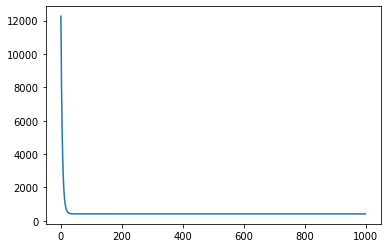

In [495]:
plt.plot(errorList)
plt.show()

In [496]:
theta

array([ 4.99096674, 29.68187118, 92.66247759,  8.28062089, 44.76773522,
        2.51916121])

In [497]:
def r2(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = 1 - (num/denom)
    return score*100

In [498]:
y_ = hypothesis(X,theta)
r2(y,y_)

96.60939669975616

In [517]:
X_test = pd.read_csv('Test/Test.csv')
u = np.mean(X_test,axis=0)
std = np.std(X_test,axis=0)
X_test = (X_test-u)/std
X_test.shape

(400, 5)

In [518]:
print(X_test.shape)
ones = np.ones((X_test.shape[0],1))
X_test = np.hstack((ones,X_test))

X_test.shape

(400, 5)


(400, 6)

In [519]:
y_test = hypothesis(X_test,theta)
y_test = pd.Series(y_test)

In [520]:
type(y_test)

pandas.core.series.Series

In [521]:
y_test


0      118.172579
1      118.066733
2      -17.973752
3      -42.814914
4      -90.875358
          ...    
395    -76.850874
396   -179.986592
397    127.808805
398     65.212689
399     60.035859
Length: 400, dtype: float64

In [522]:
df = pd.DataFrame(data=y_test,columns=['target'])
df.reset_index()

,index,target
0,0,118.172579
1,1,118.066733
2,2,-17.973752
3,3,-42.814914
4,4,-90.875358
5,5,-39.864734
6,6,-72.794088
7,7,25.436848
8,8,172.598807
9,9,173.926990


In [523]:
df.astype('int64')

,target
0,118
1,118
2,-17
3,-42
4,-90
5,-39
6,-72
7,25
8,172
9,173


In [506]:
df.to_csv('x_pred.csv')

In [507]:
a = pd.read_csv('x_pred.csv')

In [510]:
a.rename( columns={'Unnamed: 0':'Id'}, inplace=True )

In [511]:
a

,Id,target
0,0,118.172579
1,1,118.066733
2,2,-17.973752
3,3,-42.814914
4,4,-90.875358
5,5,-39.864734
6,6,-72.794088
7,7,25.436848
8,8,172.598807
9,9,173.926990


In [512]:


a = a.astype('int64')

In [513]:
a.to_csv('x_pred.csv',index=False)

In [514]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
Id        400 non-null int64
target    400 non-null int64
dtypes: int64(2)
memory usage: 6.4 KB


In [515]:
b = pd.read_csv('Test/Sample_Submission.csv')

In [516]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
Id        400 non-null int64
target    400 non-null int64
dtypes: int64(2)
memory usage: 6.4 KB
